In [1]:
import os
from yolo import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import colorsys
import matplotlib.patches as patches

Using TensorFlow backend.


In [2]:
annotation_path = './data/train_r1.txt'
log_dir = 'logs/test_model/'
model_name = 'test_model_03110907.h5'
classes_path = 'model_data/danger.txt'
anchors_path = 'model_data/my_anchors.txt'
class_names = ['fefire','blfire','knife','bat','shear']

yolo = YOLO(model_path=os.path.join(log_dir,model_name),
            classes_path=classes_path)

logs/test_model/test_model_03110907.h5 model, anchors, and classes loaded.


In [3]:
val_split = 0.1
with open(annotation_path) as f:
    lines = f.readlines()
np.random.seed(10)
np.random.shuffle(lines)
num_val = int(len(lines)*val_split)
num_train = len(lines) - num_val

train_data = lines[:num_train]
val_data = lines[num_train:]

In [4]:
def get_data(annotation_line):
    line = annotation_line.split()
    image = Image.open(line[0])
    iw, ih = image.size
    box = np.array([np.array(list(map(int,box.split(',')))) for box in line[1:]])
    return image,box

In [9]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def display_boxes(image, boxesid, class_names,
                      scores=None, title="",
                      figsize=(16, 16), ax=None):
    N = boxesid.shape[0]
    
    # Generate random colors
    colors = random_colors(N)
    
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
    # Show area outside image boundaries.
    height, width = image.height,image.width
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(title)
    for i in range(N):
        color = colors[i]
        x1, y1, x2, y2,cls = boxesid[i]
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=5,
                              alpha=0.7, linestyle="dashed",
                              edgecolor=color, facecolor='none')
        ax.add_patch(p)
        score = scores[i] if scores is not None else None
        label = class_names[cls]
        x = random.randint(x1, (x1 + x2) // 2)
        caption = "{} {:.3f}".format(label, score) if score else label
        ax.text(x1, y1 + 8, caption,
                color='b', size=15, backgroundcolor="none")
        ax.imshow(image)

(640, 640, 3)
Found 5 boxes for img


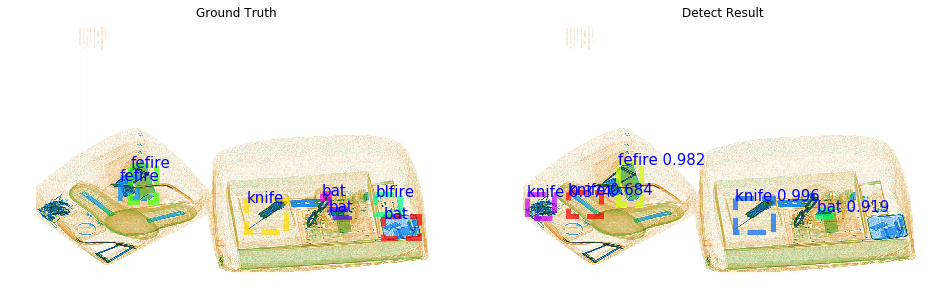

In [10]:
data = train_data[random.randint(0,len(train_data))]
img,box = get_data(data)
box_result,score_result = yolo.detect(img)
fig = plt.figure(figsize=(16,32))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
display_boxes(img,box,class_names,title="Ground Truth",ax=ax1)
display_boxes(img,box_result,class_names,scores=score_result,title="Detect Result",ax=ax2)
plt.show()

In [7]:
box[:,4],box_result[:,4]

(array([0, 0, 2, 3, 4, 4, 1, 1, 1]),
 array([0, 1, 1, 1, 1, 1, 4, 4], dtype=int32))

In [55]:
cls_count = {0:0,1:0,2:0,3:0,4:0}
for line in train_data:
    img,box = get_data(line)
    for i in range(box.shape[0]):
        cls = box[i][4]
        cls_count[cls]+=1


In [15]:
cls_count

{0: 473, 1: 1013, 2: 968, 3: 1495, 4: 655}